In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Reading the file`

In [2]:
df = pd.read_csv("GDPCountry.csv") # reading the csv file
df.head()

,Country,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Index

In [3]:

Index_Col=[]
for col in df.columns:
    if df[col].duplicated().sum()==0:
        Index_Col.append(col)
print("Index_Col  :  ",Index_Col)

Index_Col  :   ['Country', 'Population']


In [4]:
# Country is a insignificant feature.
df.set_index('Country',inplace=True)
df.head()

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Null Values

In [5]:
df.isnull().sum()

Population                             0
Area_sqm                               0
Pop_Density_per sqm                    0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [6]:
(df.isnull().sum()/len(df) * 100).round(2)

Population                            0.00
Area_sqm                              0.00
Pop_Density_per sqm                   0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [7]:
df.dropna(inplace=True)

In [8]:
(df.isnull().sum()/len(df) * 100).round(2)

Population                            0.0
Area_sqm                              0.0
Pop_Density_per sqm                   0.0
Coastline (coast/area ratio)          0.0
Net migration                         0.0
Infant mortality (per 1000 births)    0.0
GDP ($ per capita)                    0.0
Literacy (%)                          0.0
Phones (per 1000)                     0.0
Arable (%)                            0.0
Crops (%)                             0.0
Other (%)                             0.0
Climate                               0.0
Birthrate                             0.0
Deathrate                             0.0
Agriculture                           0.0
Industry                              0.0
Service                               0.0
dtype: float64

### Duplicate Values

In [9]:
df.duplicated().sum()

0

### Unique Values

In [10]:
df.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [11]:
for col in df.columns:
    print(col," : ",len(df[col].unique()) )

Population  :  179
Area_sqm  :  179
Pop_Density_per sqm  :  172
Coastline (coast/area ratio)  :  121
Net migration  :  127
Infant mortality (per 1000 births)  :  176
GDP ($ per capita)  :  114
Literacy (%)  :  130
Phones (per 1000)  :  173
Arable (%)  :  170
Crops (%)  :  139
Other (%)  :  174
Climate  :  6
Birthrate  :  177
Deathrate  :  165
Agriculture  :  136
Industry  :  135
Service  :  146


### Outlier Analysis

In [12]:
import seaborn as sns

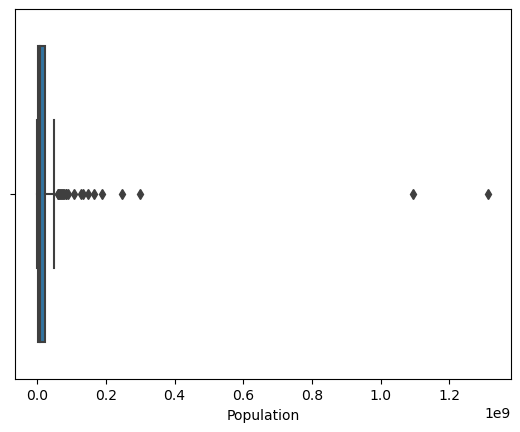

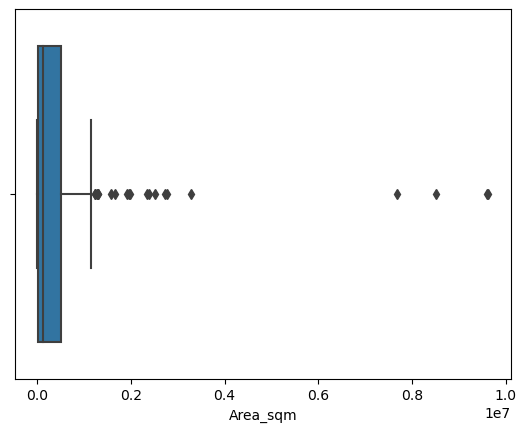

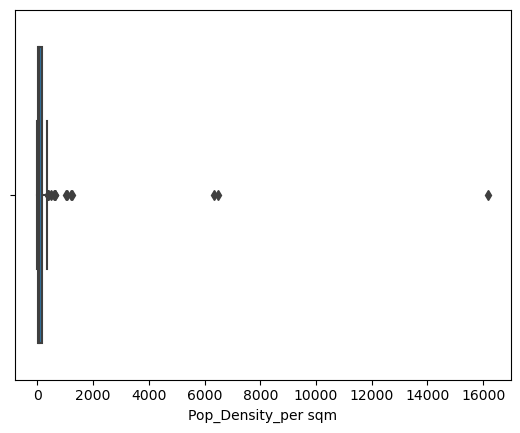

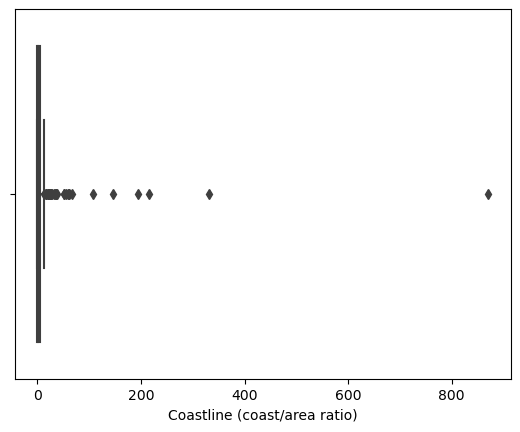

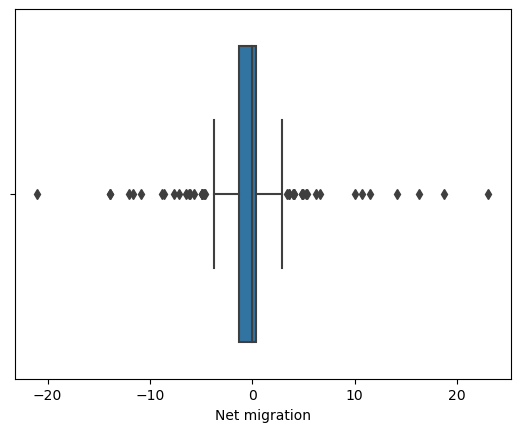

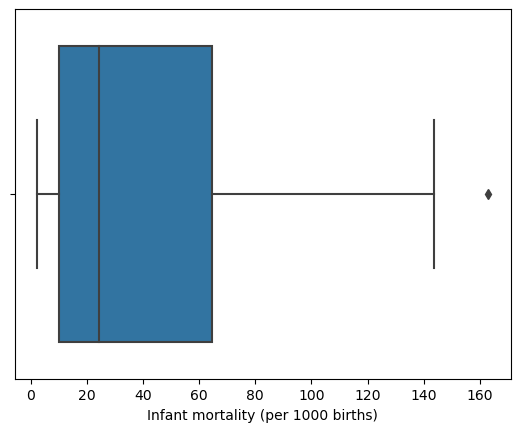

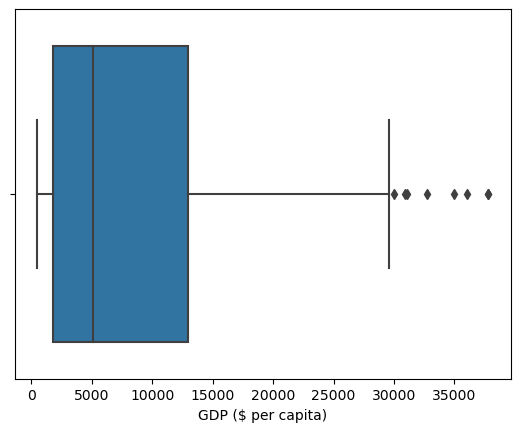

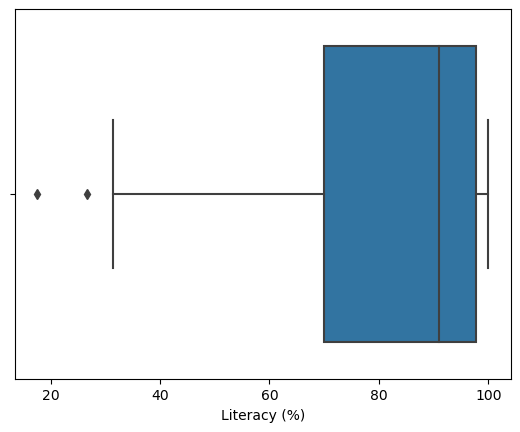

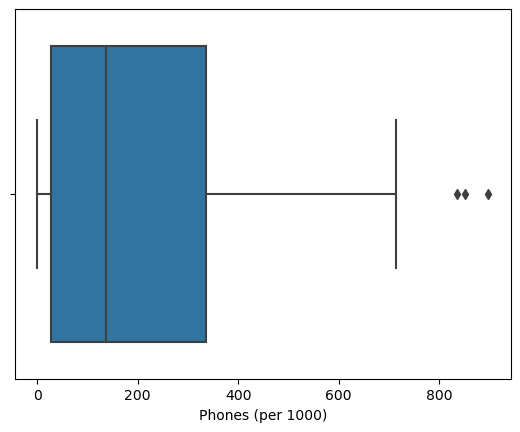

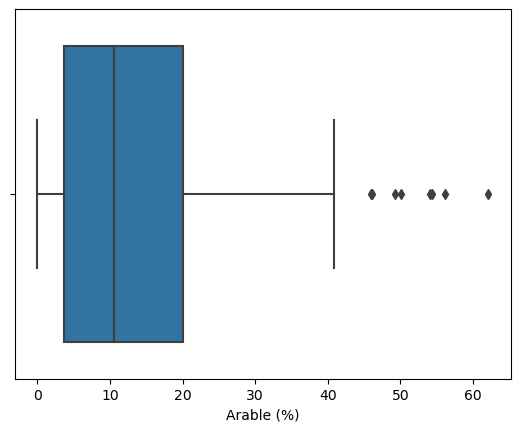

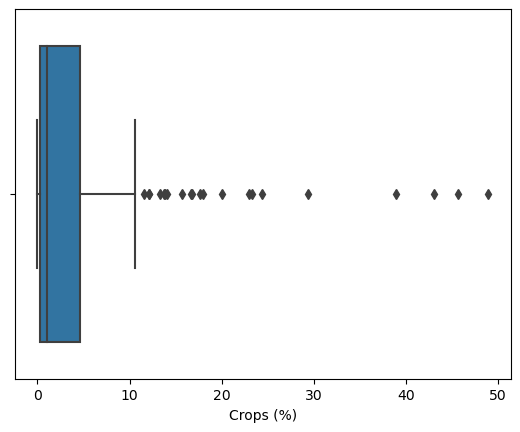

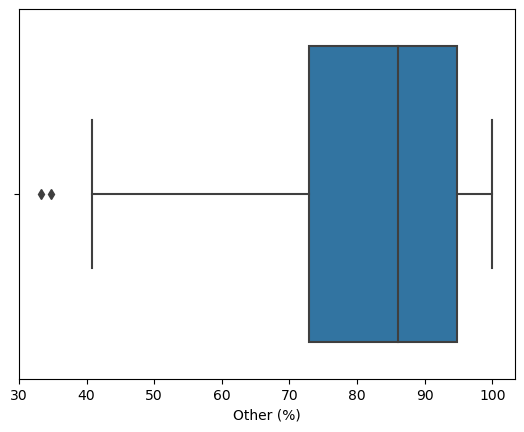

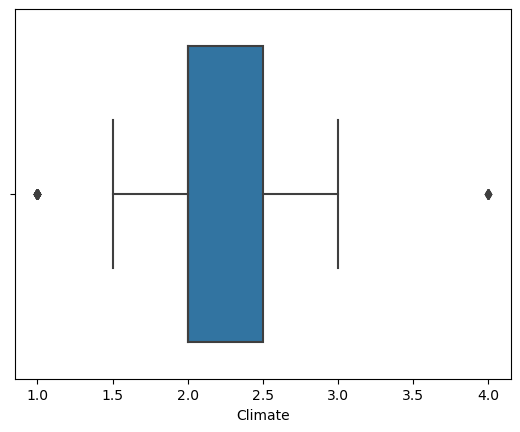

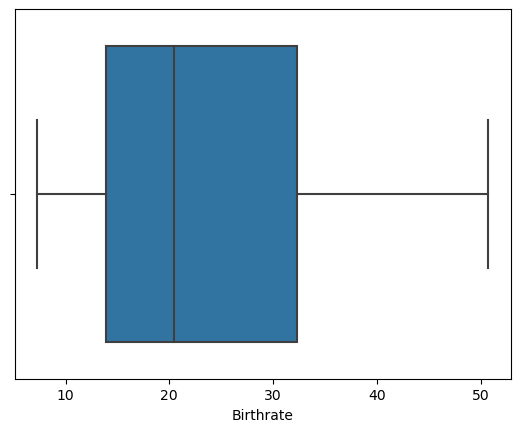

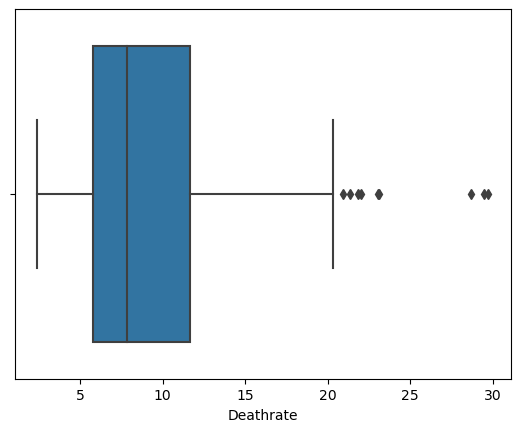

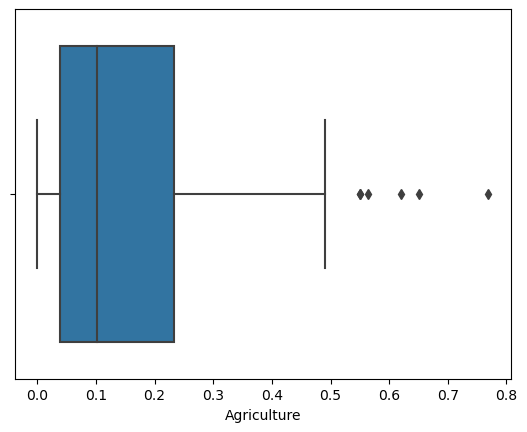

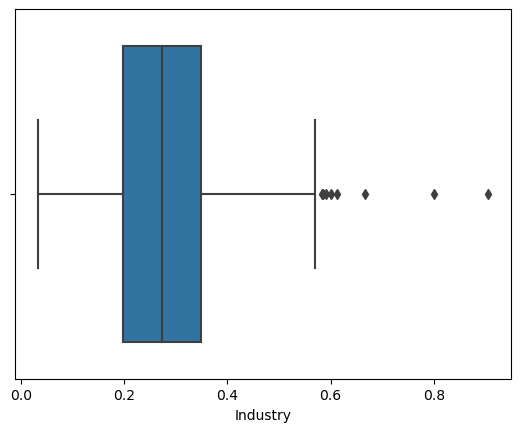

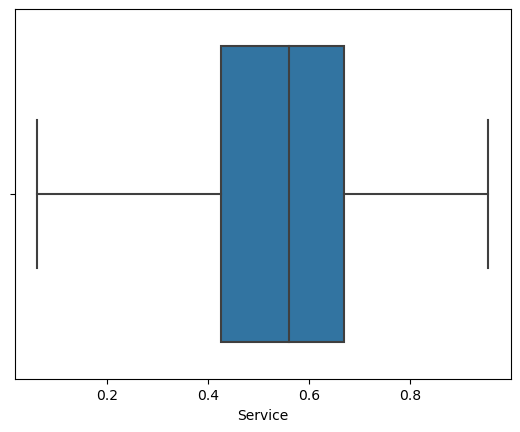

In [13]:
for column in df.columns:
    sns.boxplot(x=column,data=df)
    plt.show()

In [14]:
# FLooring and Capping
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    for index in df[column].index:
        if df.loc[index,column]> ul:
            df.loc[index,column]=ul
        if df.loc[index,column]< ll:
            df.loc[index,column]=ll

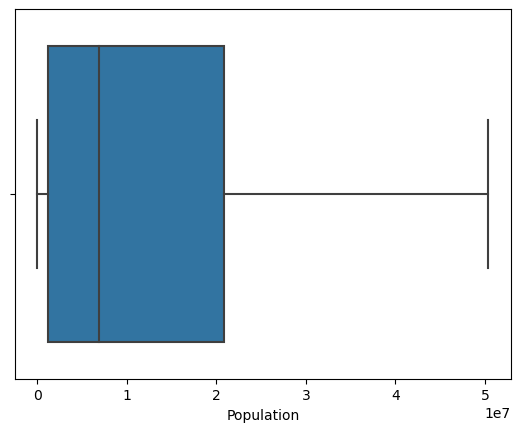

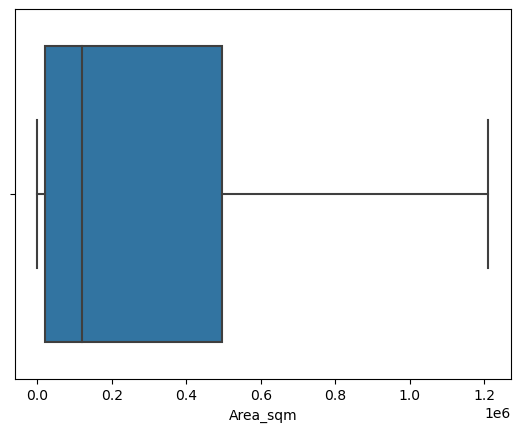

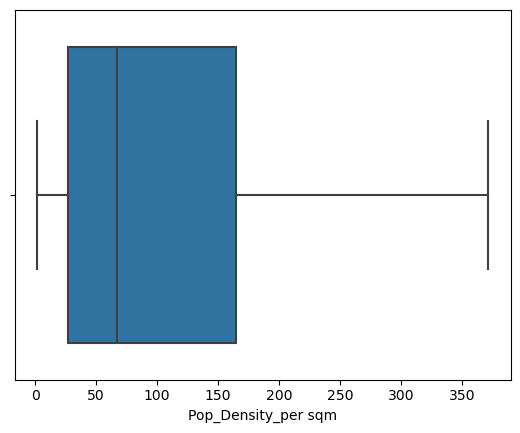

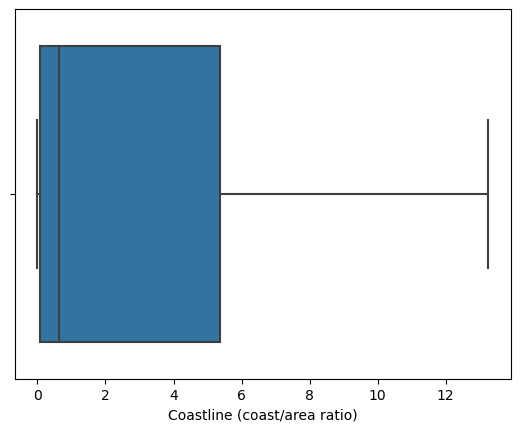

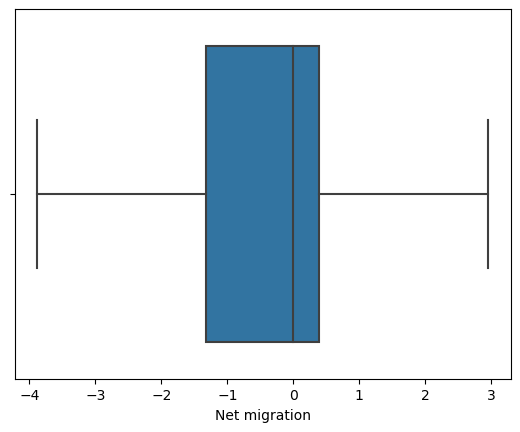

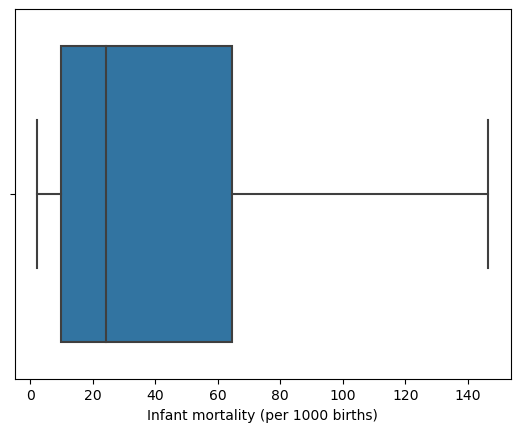

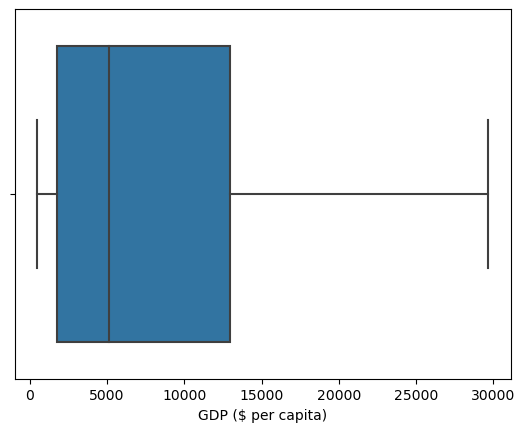

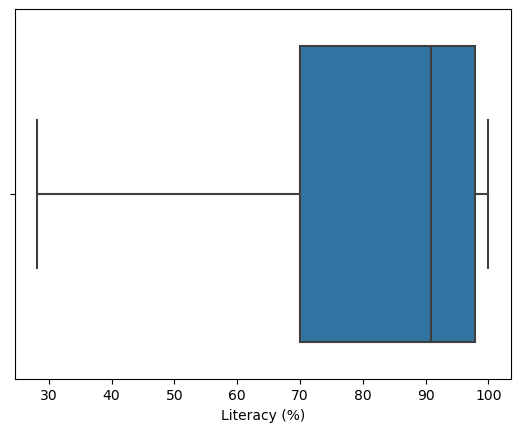

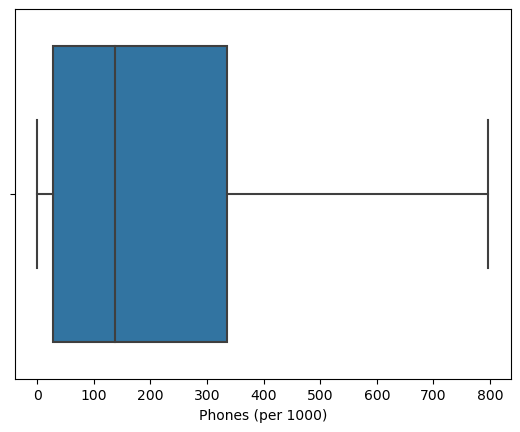

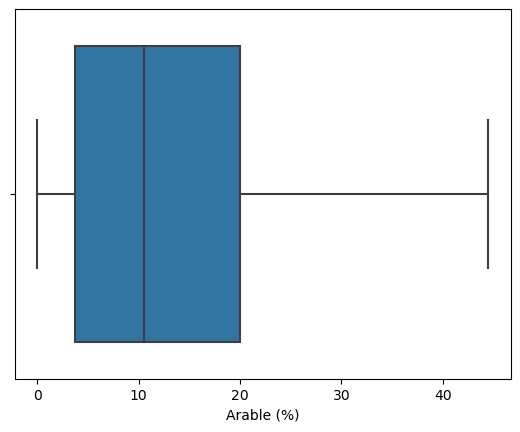

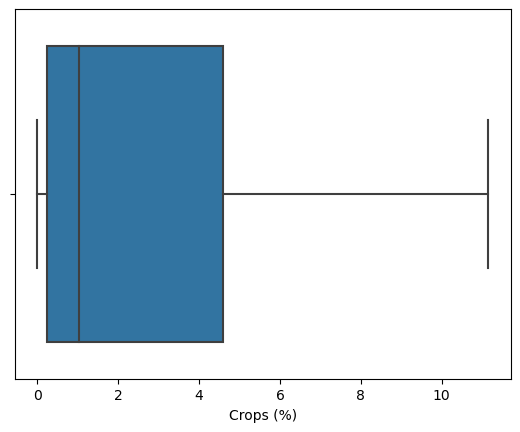

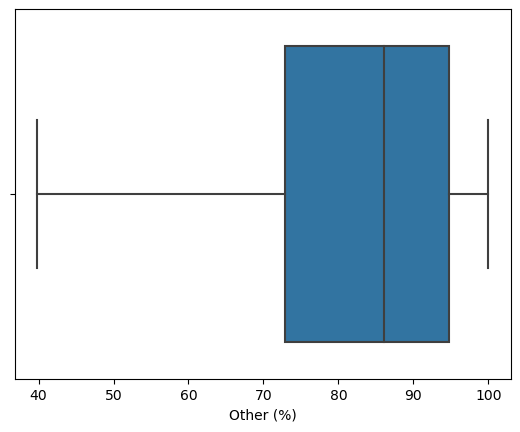

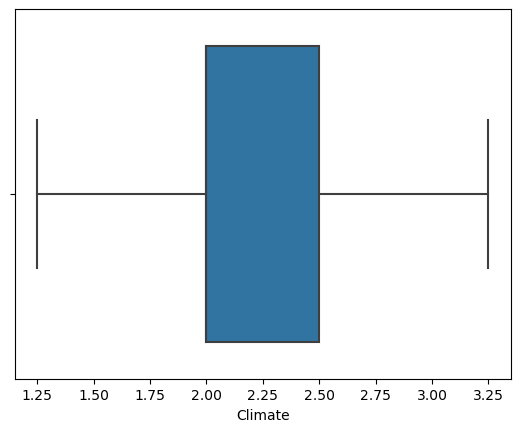

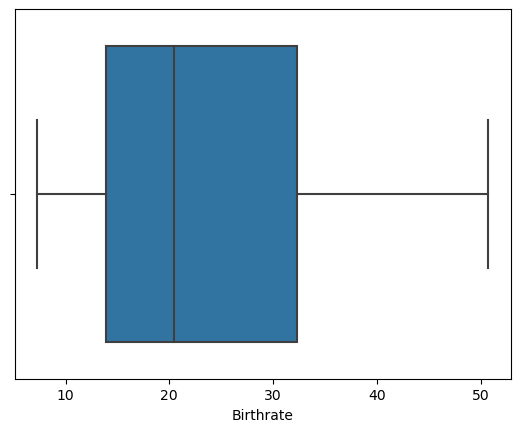

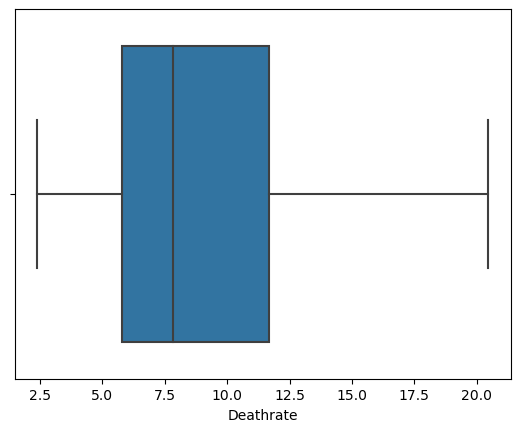

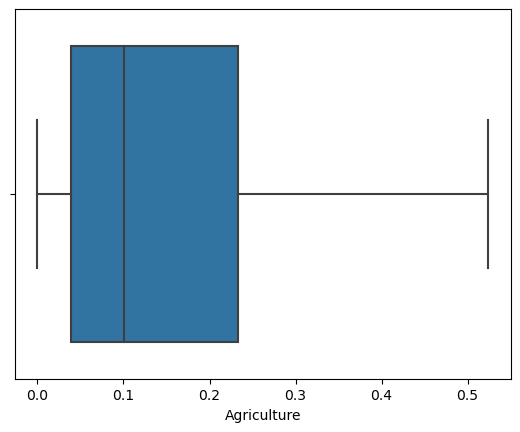

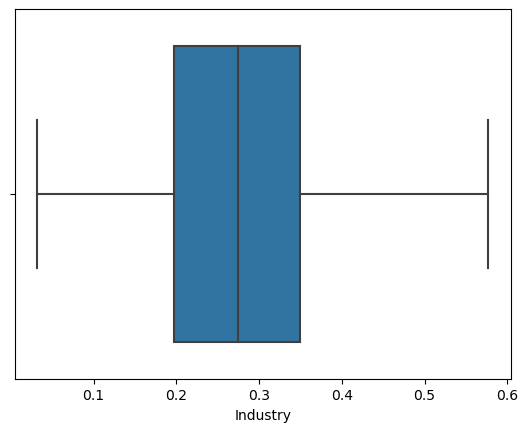

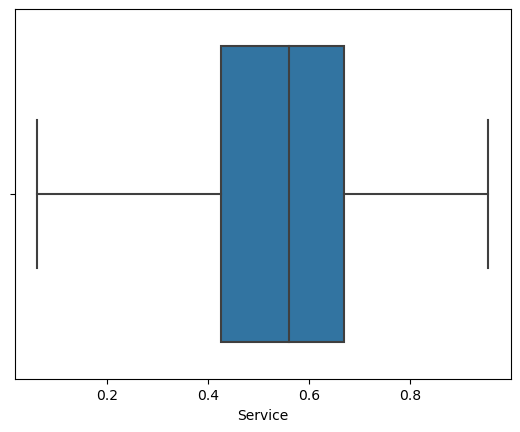

In [15]:
for column in df.columns:
    sns.boxplot(x=column,data=df)
    plt.show()

### EDA

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,179.0,1.431826e+07,1.712604e+07,13477.0000,1.188580e+06,6940432.000,2.086014e+07,5.036747e+07
Area_sqm,179.0,3.263721e+05,4.088160e+05,28.0000,1.991500e+04,118480.000,4.964410e+05,1.211230e+06
Pop_Density_per sqm,179.0,1.166430e+02,1.159098e+02,1.8000,2.680000e+01,66.900,1.647000e+02,3.715500e+02
Coastline (coast/area ratio),179.0,3.528436e+00,5.084089e+00,0.0000,9.000000e-02,0.630,5.355000e+00,1.325250e+01
Net migration,179.0,-2.905028e-01,2.006700e+00,-3.8800,-1.315000e+00,0.000,3.950000e-01,2.960000e+00
Infant mortality (per 1000 births),179.0,3.880574e+01,3.504688e+01,2.2900,9.990000e+00,24.310,6.460500e+01,1.465275e+02
GDP ($ per capita),179.0,8.936313e+03,9.162325e+03,500.0000,1.800000e+03,5100.000,1.295000e+04,2.967500e+04
Literacy (%),179.0,8.201201e+01,1.963519e+01,28.1750,6.995000e+01,90.900,9.780000e+01,1.000000e+02
Phones (per 1000),179.0,2.070617e+02,2.068242e+02,0.2000,2.710000e+01,137.100,3.350000e+02,7.968500e+02
Arable (%),179.0,1.365268e+01,1.215031e+01,0.0000,3.675000e+00,10.530,2.000000e+01,4.448750e+01


### Univariate Anlaysis

Skew: 1.2106134554046426


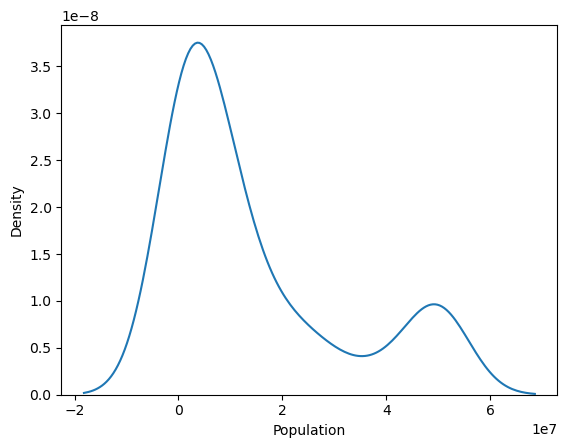

**************************************************
Skew: 1.2354813475525384


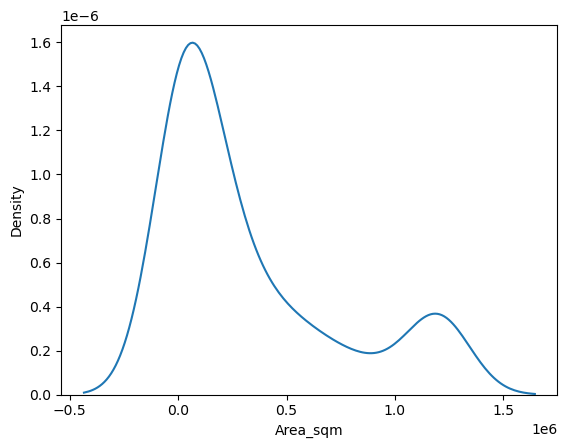

**************************************************
Skew: 1.0832580874855573


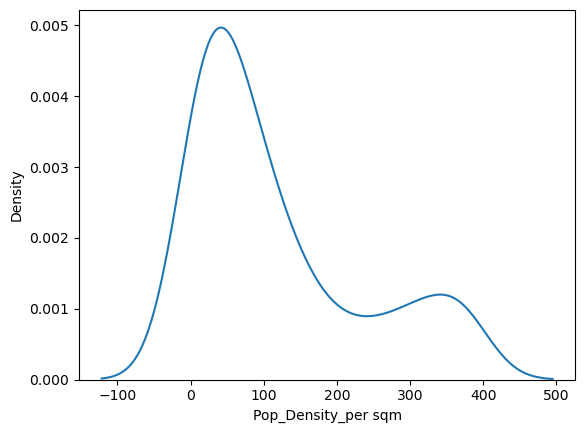

**************************************************
Skew: 1.20319393912607


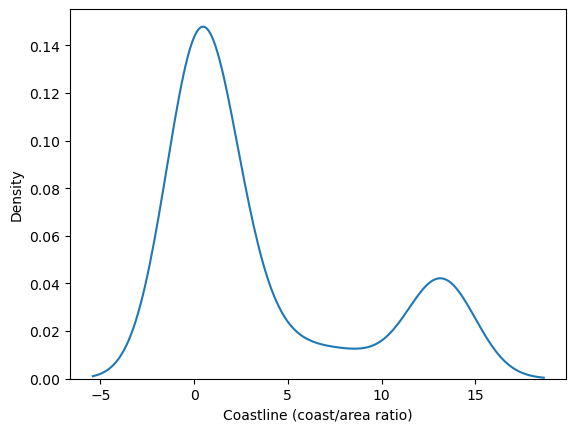

**************************************************
Skew: -0.1937018060068344


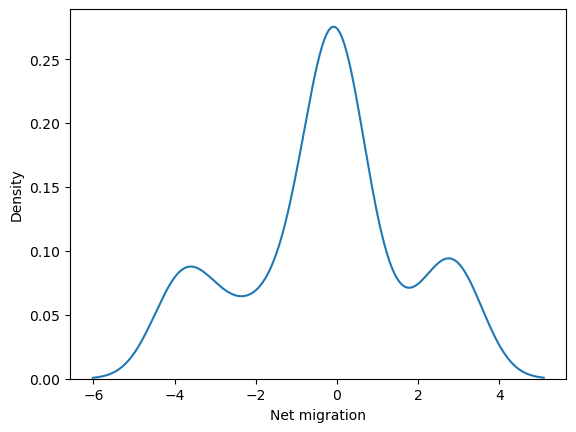

**************************************************
Skew: 1.020185274583957


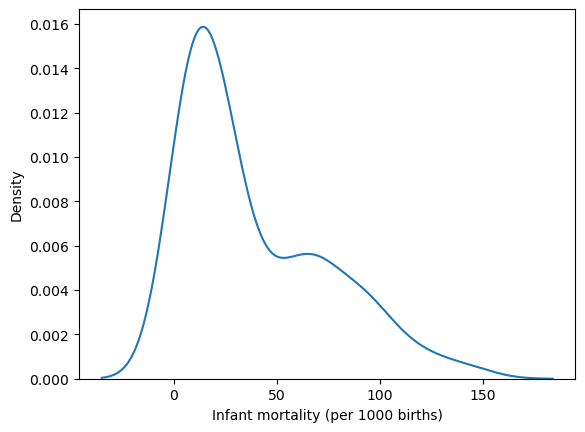

**************************************************
Skew: 1.1615151424473706


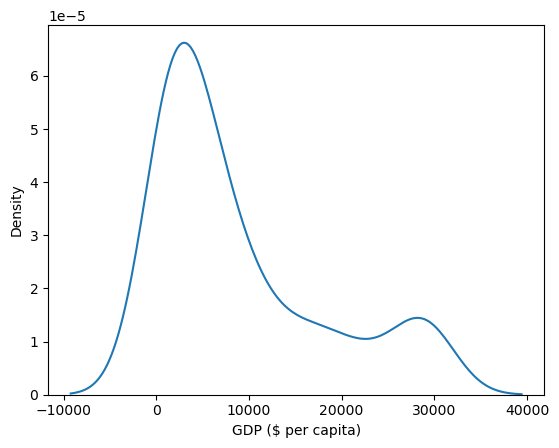

**************************************************
Skew: -1.1259757167492883


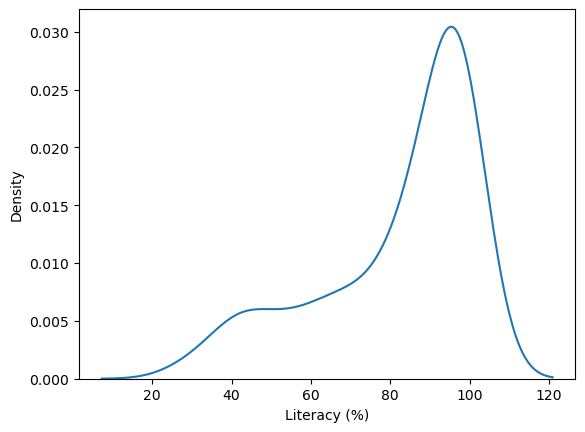

**************************************************
Skew: 0.9565665391549412


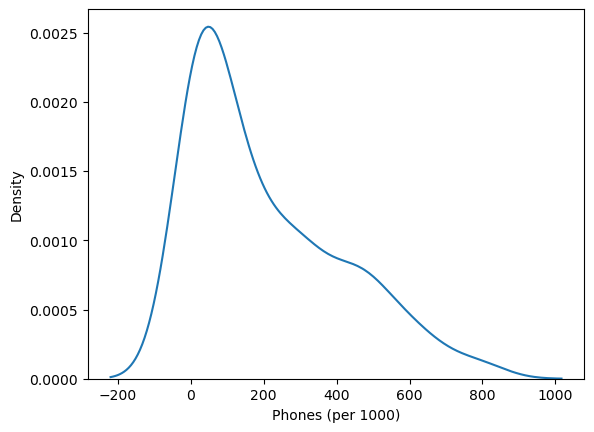

**************************************************
Skew: 1.0307227170637852


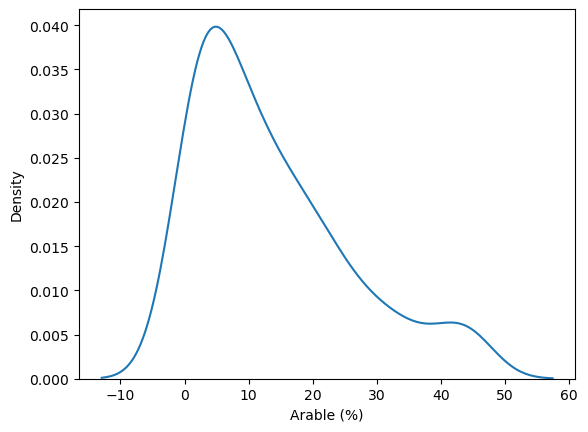

**************************************************
Skew: 1.1889150263546235


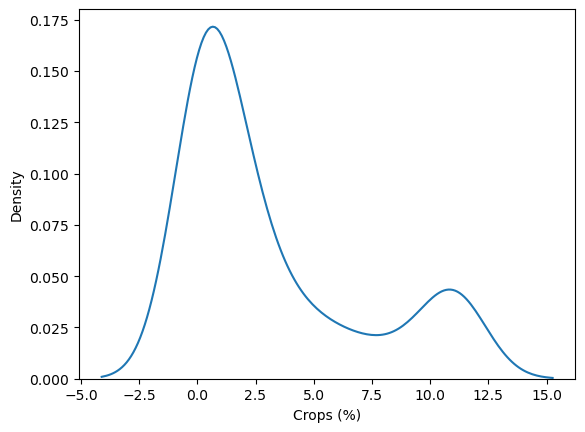

**************************************************
Skew: -0.9351712874363406


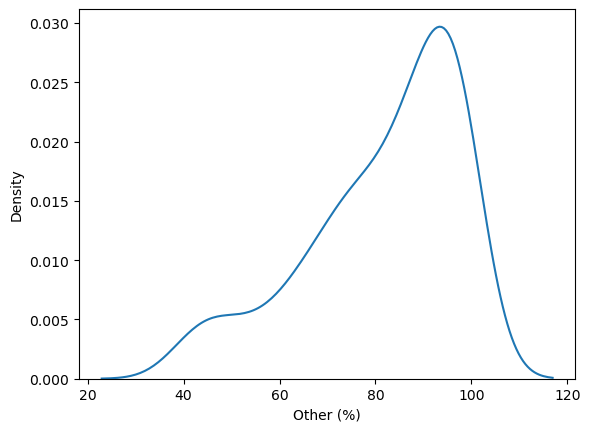

**************************************************
Skew: 0.36119254476372536


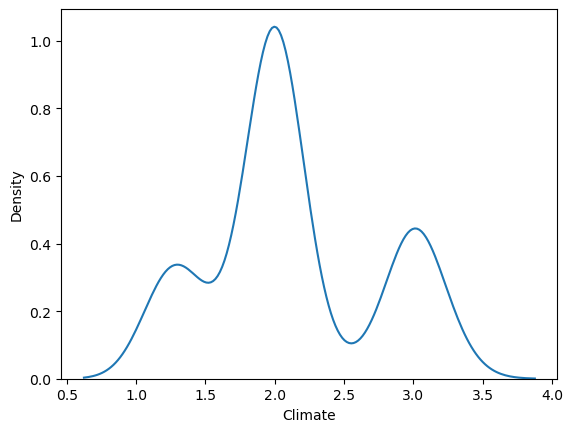

**************************************************
Skew: 0.634294396035917


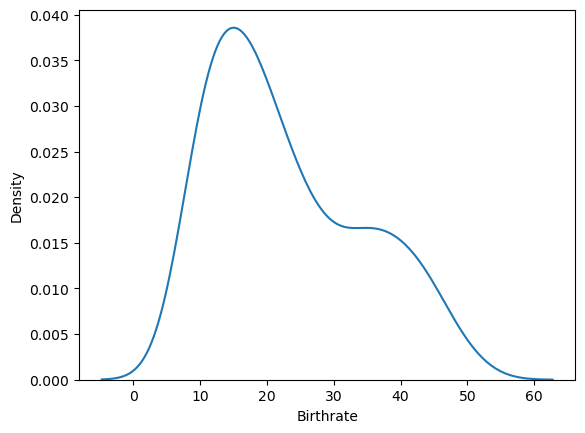

**************************************************
Skew: 1.062817245570343


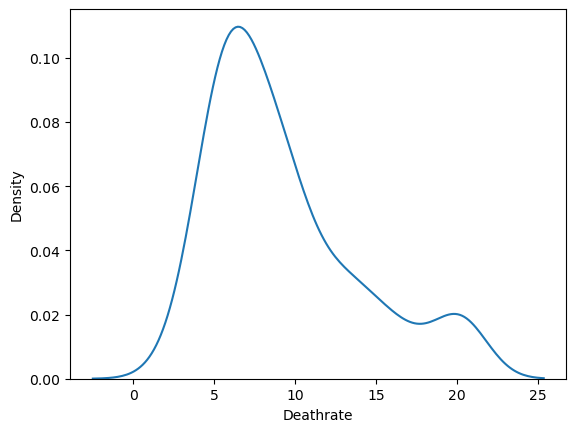

**************************************************
Skew: 1.0537450310639724


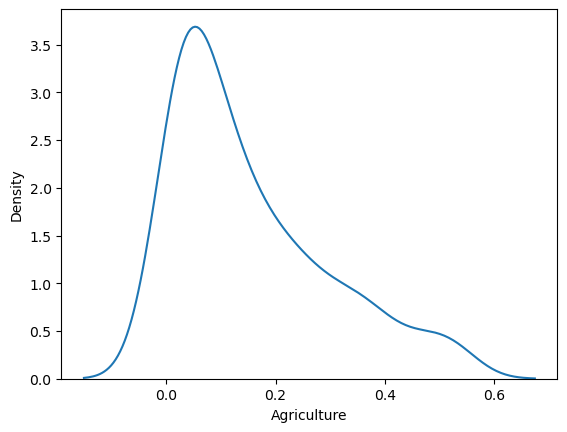

**************************************************
Skew: 0.5297207437334127


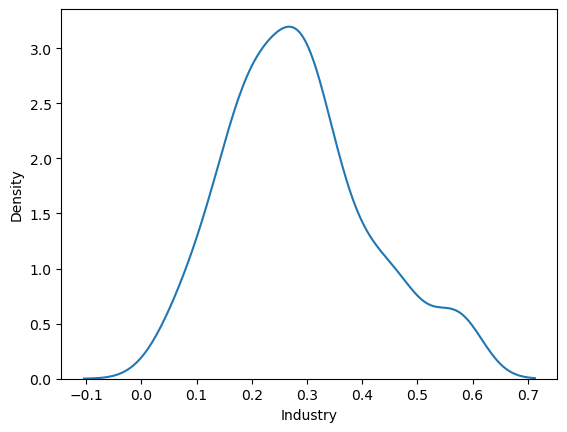

**************************************************
Skew: -0.11563773023575401


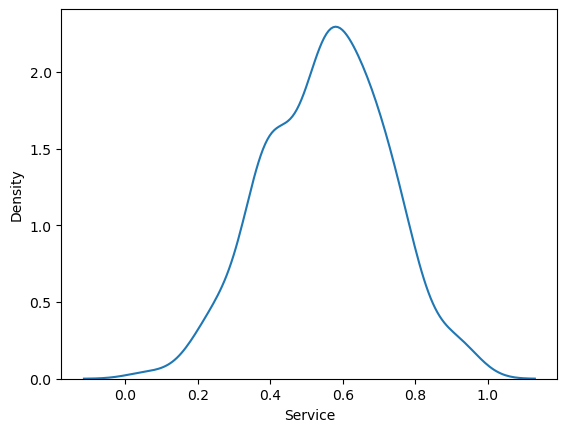

**************************************************


In [17]:
for column in df.columns:
    print('Skew:',df[column].skew())
    sns.kdeplot(x=column,data=df)
    plt.show()
    print("*"*50)

In [18]:
# Inference

# 1) Most of the columns having mild skewness(+ve skew)
# 2) Target : GDP -> most of values are b/w 0 and 10000
# 3) Others and Literacy have negative skewness

### Bivariate Analysis

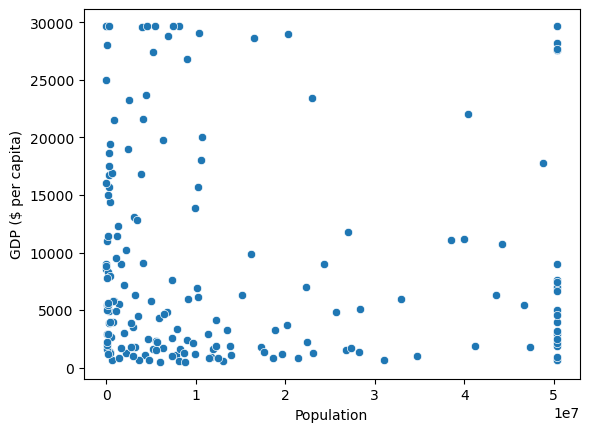

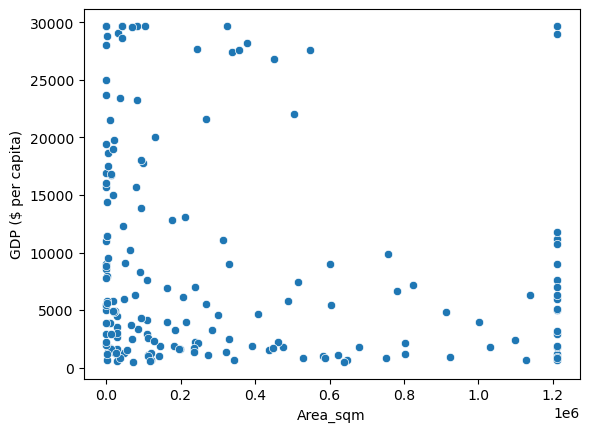

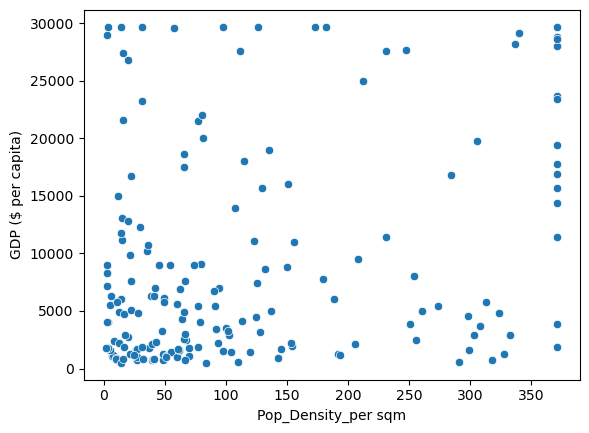

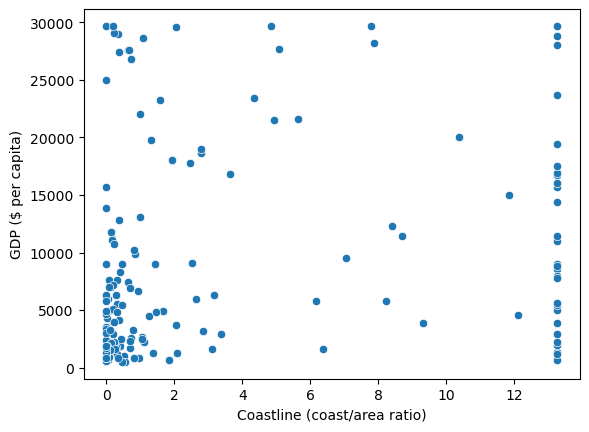

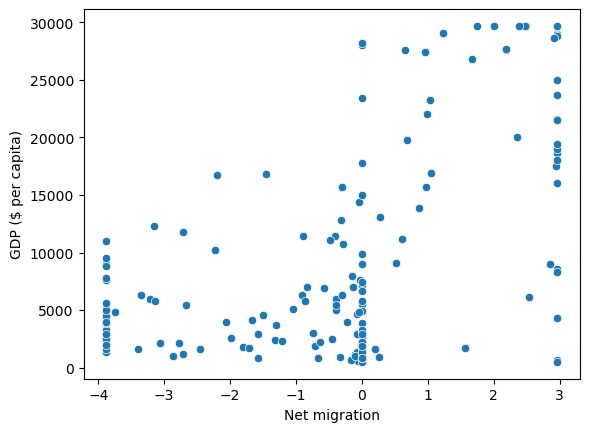

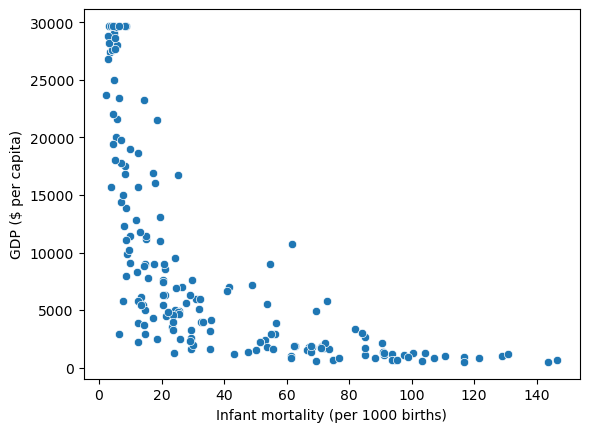

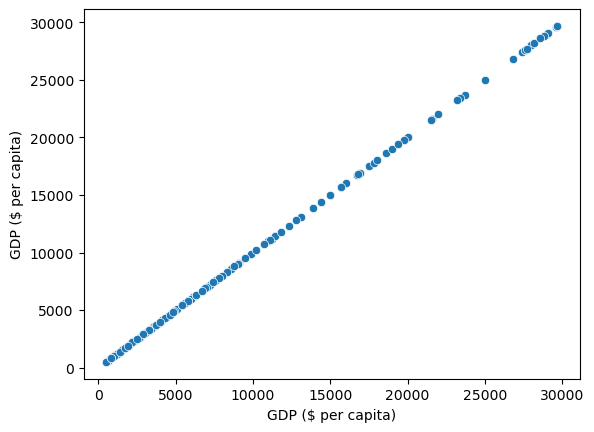

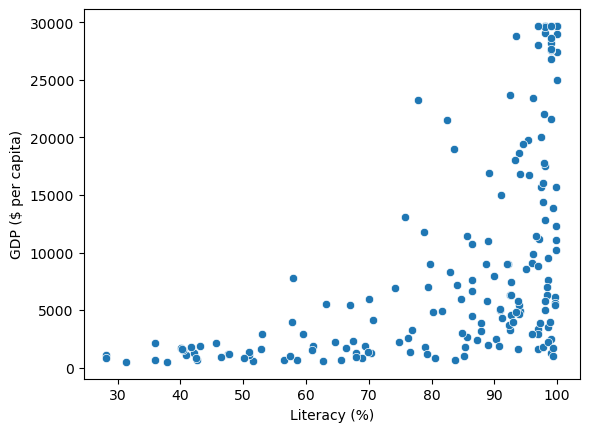

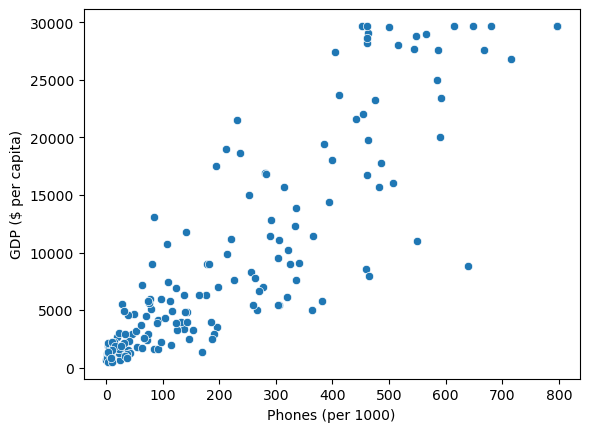

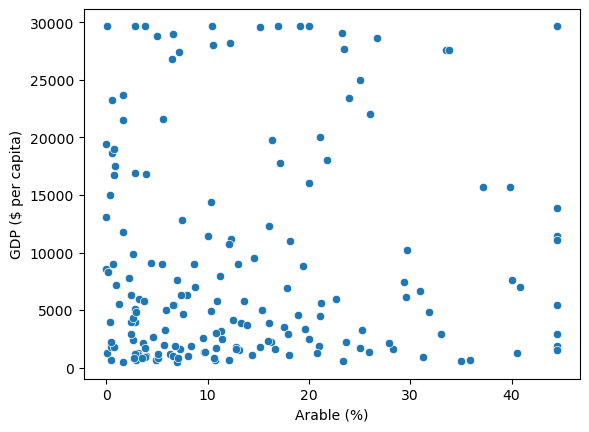

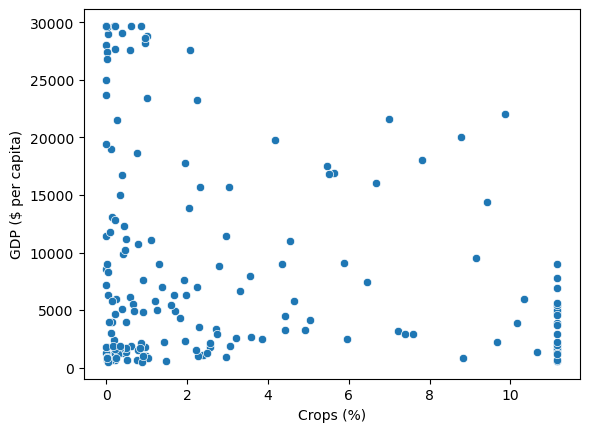

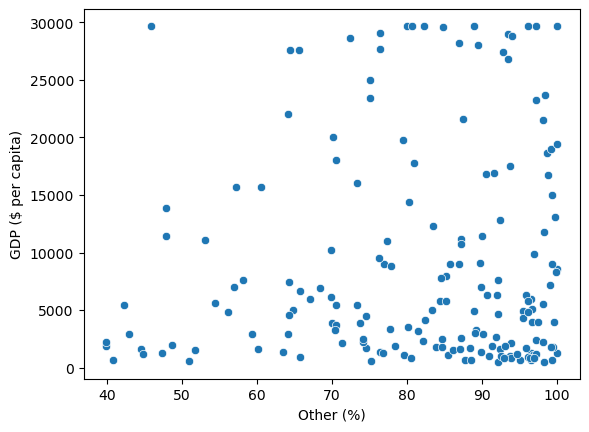

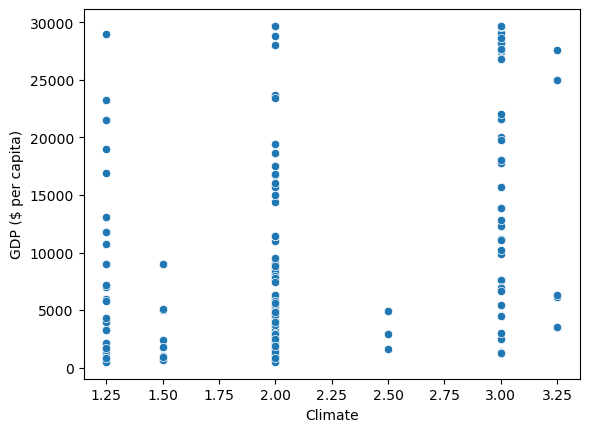

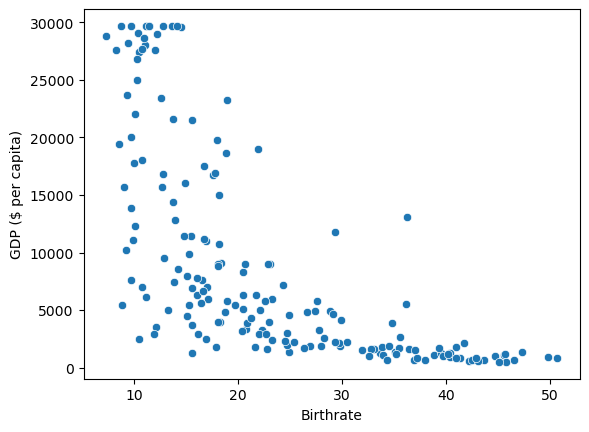

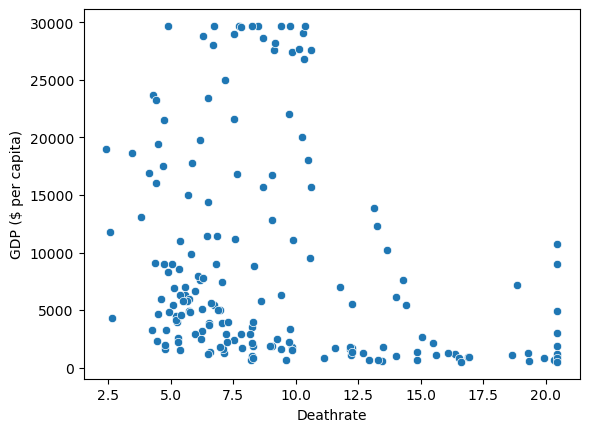

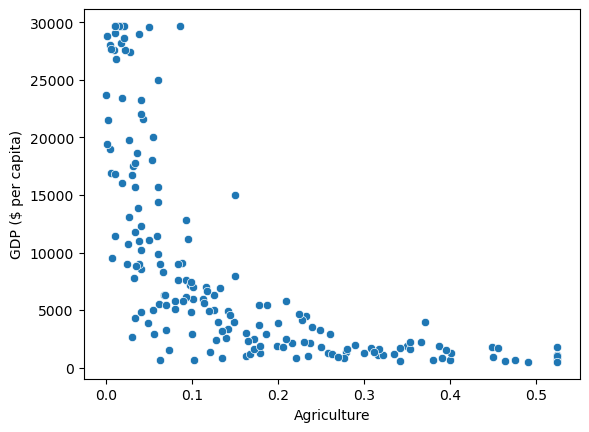

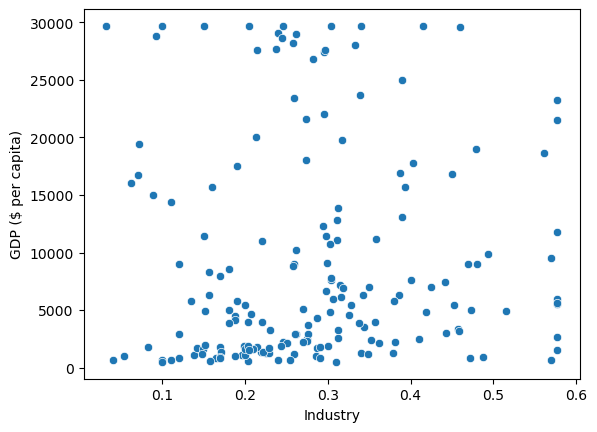

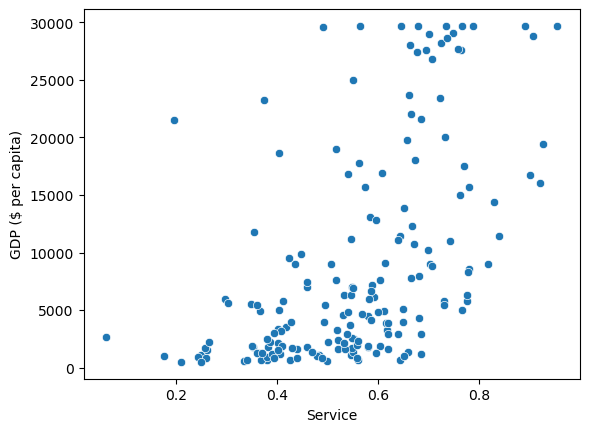

In [19]:
for column in df.columns:
    sns.scatterplot(x=column,y='GDP ($ per capita)',data=df)
    plt.show()

In [20]:
# Infant mortality rate have negative impact on GDP per capita
# Literacy and Phone have postive impact onGDP
# Birth rate have negative impact on GDP
# Agriculture has negative impact on GDP

### Correlation

<Axes: >

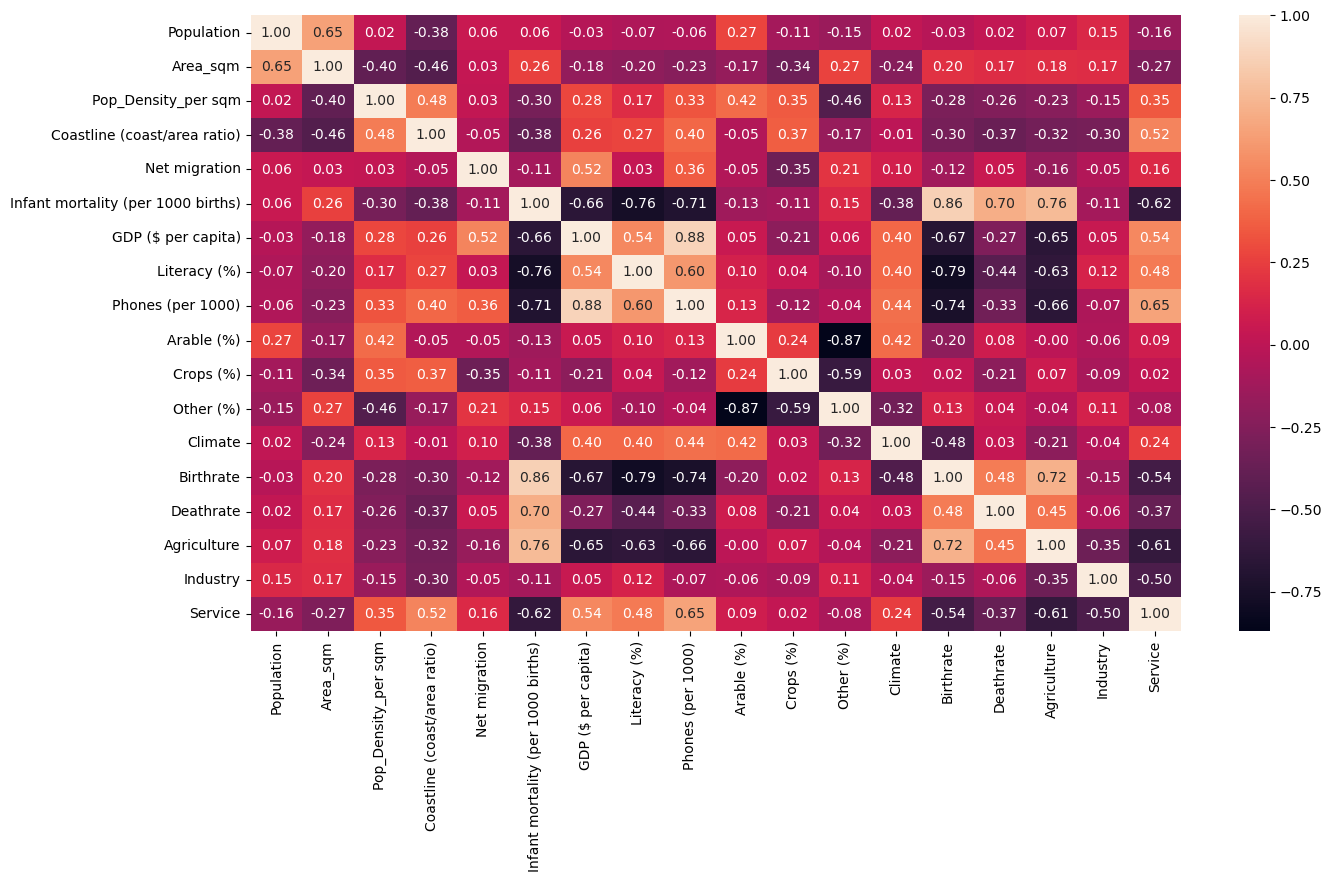

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [22]:
df.corr()['Phones (per 1000)']

Population                           -0.058501
Area_sqm                             -0.230103
Pop_Density_per sqm                   0.330108
Coastline (coast/area ratio)          0.401475
Net migration                         0.362842
Infant mortality (per 1000 births)   -0.709175
GDP ($ per capita)                    0.880319
Literacy (%)                          0.600049
Phones (per 1000)                     1.000000
Arable (%)                            0.134800
Crops (%)                            -0.122281
Other (%)                            -0.043315
Climate                               0.437298
Birthrate                            -0.739986
Deathrate                            -0.326951
Agriculture                          -0.658013
Industry                             -0.071161
Service                               0.650556
Name: Phones (per 1000), dtype: float64

### Spliting Data

In [23]:
x = df.drop(columns='GDP ($ per capita)') # Independant Variables
y = df['GDP ($ per capita)']  # Dependant Variables

### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler  # Standardization

In [25]:
ss = StandardScaler() # Scaling # Standardization (-3 to +3)
x_scaled = pd.DataFrame(ss.fit_transform(x),index=x.index,columns=x.columns)# Scaling only the independant variables
x_scaled

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Afghanistan,0.980127,0.787711,-0.593872,-0.695962,1.624368,3.082269,-2.349918,-0.988441,-0.125672,-0.750619,0.379594,-1.488879,2.090732,2.411355,1.600318,-0.344635,-1.056306
Albania,-0.628675,-0.730057,0.068841,-0.447435,-1.793773,-0.494601,0.229210,-0.658738,0.613827,0.339561,-0.449213,1.486504,-0.706978,-0.880322,0.553331,-0.752449,0.148249
Algeria,1.089805,2.170512,-0.889756,-0.688072,-0.049722,-0.223348,-0.613475,-0.625282,-0.861044,-0.742832,0.938850,-1.488879,-0.526624,-1.013121,-0.373393,2.298313,-1.552656
Anguilla,-0.837608,-0.800324,0.133728,1.918012,1.624368,-0.508622,0.663320,1.226393,-1.126801,-0.807724,1.157388,-0.213715,-0.790492,-0.854197,-0.804921,-0.815190,1.364910
Antigua & Barbuda,-0.834350,-0.799488,0.340501,1.918012,-1.793773,-0.553544,0.356889,1.662281,0.373655,0.373305,-0.274130,-0.213715,-0.545281,-0.847666,-0.819070,-0.501487,1.140947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.668233,1.436638,-0.765173,-0.634817,0.125183,-0.475144,0.581605,-0.324670,-0.883328,-0.568922,0.913658,-0.213715,-0.387138,-0.945633,-0.804921,1.059186,-0.081767
Vietnam,2.110840,0.007820,1.206525,-0.488856,-0.079705,-0.367844,0.423283,-0.093877,0.521389,0.736698,-0.475034,-0.213715,-0.551500,-0.662618,0.390624,0.988603,-1.050253
Yemen,0.417957,0.494510,-0.657893,-0.624954,0.145172,0.649356,-1.624698,-0.823590,-0.897358,-0.745428,0.967190,-1.488879,1.761119,-0.209795,-0.132869,1.474842,-0.977617


### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=10)

In [28]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(143, 17) (143,)
(36, 17) (36,)


In [29]:
x_test.head()

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Seychelles,-0.833622,-0.799458,0.541218,1.918012,-1.793773,-0.665995,-1.226337,0.268312,-0.943577,2.087743,0.178061,-0.213715,-0.625241,-0.647379,-0.861515,0.157290,0.668810
Jordan,-0.492530,-0.574167,-0.455446,-0.690045,1.624368,-0.613918,0.474355,-0.497280,-0.906437,-0.332717,0.873981,-1.488879,-0.161473,-1.439820,-0.854441,0.023966,0.759606
Grenada,-0.833145,-0.799730,1.247188,1.918012,-1.793773,-0.692033,0.816536,0.763353,-0.641505,2.087743,-1.065150,-0.213715,-0.087733,-0.518934,-0.705882,-0.815190,1.280167
Norway,-0.568413,-0.006304,-0.886296,0.836622,1.014700,-1.004489,0.918680,1.234636,-0.889930,-0.807724,0.976637,1.486504,-1.031260,0.029679,-0.939331,1.027816,0.057453
Niger,-0.104998,2.170512,-0.923497,-0.695962,-0.189646,2.371588,-2.749555,-0.994745,-0.834633,-0.805128,0.933811,-1.488879,2.457659,2.436935,1.671060,-0.893616,-0.693124


In [30]:
y_test.head()

Country
Seychelles     7800.0
Jordan         4300.0
Grenada        5000.0
Norway        29675.0
Niger           800.0
Name: GDP ($ per capita), dtype: float64

### Linear Regression Model

In [31]:
x_train_cons = sm.add_constant(x_train)
x_train_cons.head()

,const,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Bulgaria,1.0,-0.405951,-0.528518,-0.432952,-0.632844,-1.793773,-0.522356,0.847179,0.626623,2.176182,-0.309356,-1.483961,1.486504,-1.192068,1.089895,-0.429987,0.157290,0.293522
Comoros,1.0,-0.797939,-0.795251,1.745520,1.918012,0.145172,1.033632,-1.302945,-0.885167,1.833669,2.087743,-2.570353,-0.213715,1.231607,-0.231565,1.741802,-1.913150,0.033241
Zimbabwe,1.0,-0.121878,0.157499,-0.738353,-0.695962,0.145172,0.826472,0.443711,-0.874015,-0.440124,-0.719471,0.611988,-0.213715,0.439115,2.436935,0.178397,-0.321107,0.148249
Denmark,1.0,-0.519237,-0.694867,0.085279,1.918012,1.384499,-0.979882,0.918680,1.975985,2.544900,-0.758406,-2.256717,1.486504,-1.060579,0.238674,-0.960554,-0.297580,1.092523
French Polynesia,1.0,-0.822319,-0.790353,-0.439008,1.918012,1.614374,-0.868862,0.816536,-0.060907,-1.059124,0.609510,0.761878,-0.213715,-0.567492,-0.995705,-0.868589,-0.736764,1.298326


In [32]:
x_train_cons.values[1]

array([ 1.        , -0.797939  , -0.7952513 ,  1.74551994,  1.91801152,
        0.14517248,  1.03363242, -1.30294512, -0.88516657,  1.83366895,
        2.08774255, -2.57035324, -0.21371463,  1.23160659, -0.23156534,
        1.7418023 , -1.91315035,  0.033241  ])

In [33]:
lin_reg_ols = sm.OLS(y_train,x_train_cons).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     42.63
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.01e-43
Time:                        15:57:47   Log-Likelihood:                -1359.3
No. Observations:                 143   AIC:                             2755.
Df Residuals:                     125   BIC:                             2808.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               8804.2641    296.052     29.739      0.000    8218.340    9390.188
Population                            -4.6654    475.910     -0.010      0.992    -946.550     937.219
Area_sqm                            -107.7616    503.349     -0.214      0.831   -1103.952     888.429
Pop_Density_per sqm                  898.4375    417.290      2.153      0.033      72.568    1724.307
Coastline (coast/area ratio)        -737.0221    507.980     -1.451      0.149   -1742.378     268.333
Net migration                       2062.8889    361.018      5.714      0.000    1348.390    2777.388
Infant mortality (per 1000 births) -2826.6060   1092.438     -2.587      0.011   -4988.676    -664.536
Literacy (%)                        -470.2124    565.836     -0.831      0.408   -1590.072     649.647
Phones (per 1000)                   5910.6660    620.075      9.532      0.000    4683.461    7137.871
Arable (%)                         -1507.3642   1039.982     -1.449      0.150   -3565.618     550.889
Crops (%)                           -428.2728    533.830     -0.802      0.424   -1484.788     628.243
Other (%)                           -698.5713   1131.678     -0.617      0.538   -2938.302    1541.160
Climate                               58.6557    408.227      0.144      0.886    -749.277     866.588
Birthrate                            412.1212    764.335      0.539      0.591   -1100.592    1924.835
Deathrate                           1230.9934    550.823      2.235      0.027     140.846    2321.141
Agriculture                        -1504.6183   1327.433     -1.133      0.259   -4131.774    1122.537
Industry                            -444.9030   1245.237     -0.357      0.721   -2909.382    2019.576
Service                             -939.6293   1440.562     -0.652      0.515   -3790.680    1911.421
==============================================================================
Omnibus:                        9.501   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               17.832
Skew:                          -0.219   Prob(JB):                     0.000134
Kurtosis:                       4.674   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Performance Metrics

In [34]:
x_test_cons = sm.add_constant(x_test)
y_test_pred = lin_reg_ols.predict(sm.add_constant(x_test_cons)) # Predicted values of x_test

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [36]:
mse = mean_squared_error(y_test,y_test_pred) # actual and predicted
print('MSE:',mse)
print('RMSE:',np.sqrt(mse))
mape = mean_absolute_percentage_error(y_test,y_test_pred)
print("MAPE:",mape*100)

MSE: 18621642.25537081
RMSE: 4315.280090025538
MAPE: 83.50695019164363


In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,y_test_pred)  # Test R2

0.8526357970599114

## Train & Test Score

In [39]:
y_train_pred = lin_reg_ols.predict(x_train_cons) # Giving the same data in which it is trained.
y_test_pred = lin_reg_ols.predict(x_test_cons) # Giving a new data which is unknown to my model

In [40]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 3250.369981584895
Test RMSE: 4315.280090025538


In [41]:
print('Train MAPE:',np.sqrt(mean_absolute_percentage_error(y_train,y_train_pred)))
print('Test MAPE:',np.sqrt(mean_absolute_percentage_error(y_test,y_test_pred)))

Train MAPE: 0.8060014780879885
Test MAPE: 0.9138213730901878


In [42]:
print('Train R2:',r2_score(y_train,y_train_pred))
print('Test R2:',r2_score(y_test,y_test_pred))

Train R2: 0.8528901683383779
Test R2: 0.8526357970599114


In [43]:
# With respect to MAPE, there is slight overfitting in the model.

## Cross validation Score

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
lin_reg_sk = LinearRegression()  # Cross validation can take only scikit learn models
lin_reg_sk.fit(x_train,y_train)
scores = cross_val_score(lin_reg_sk,x_train,y_train,cv=3,scoring='r2') # cv=3 (train_split combinations)
print(scores)
print('Avg Score:', np.mean(scores))
print('Std Score:',np.std(scores))

[0.74698545 0.79620428 0.84734448]
Avg Score: 0.7968447372005132
Std Score: 0.040973905573304624


## Assumptions of Linear Regression

#### Mulitcollinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif_values=[]
for col in range(len(x_train_cons.columns)):
    vif_values.append(variance_inflation_factor(x_train_cons.values,col))

In [50]:
#vif_values = [variance_inflation_factor(x_train_cons.values,col) for col in range(len(x_train_cons.columns))]
vif_df = pd.DataFrame({'Colums':x_train_cons.columns,'VIF Score'
                       : vif_values})
vif_df.sort_values(by ='VIF Score',ascending=False,inplace=True)
vif_df

,Colums,VIF Score
17,Service,23.683314
15,Agriculture,20.322347
16,Industry,19.085260
11,Other (%),16.388677
9,Arable (%),13.974542
6,Infant mortality (per 1000 births),12.287194
13,Birthrate,6.706411
8,Phones (per 1000),3.823299
7,Literacy (%),3.645131
14,Deathrate,3.364734


In [51]:
x_train_vif = x_train_cons.drop(columns='Service')
vif_values = [variance_inflation_factor(x_train_vif.values,col) for col in range(x_train_vif.shape[1])]
vif_df = pd.DataFrame({'Colums':x_train_vif.columns,'VIF Score': vif_values})
vif_df.sort_values(by ='VIF Score',ascending=False,inplace=True)
vif_df

,Colums,VIF Score
11,Other (%),16.387414
9,Arable (%),13.973651
6,Infant mortality (per 1000 births),12.032713
13,Birthrate,6.705402
15,Agriculture,3.880746
8,Phones (per 1000),3.819424
7,Literacy (%),3.610271
10,Crops (%),3.353023
14,Deathrate,3.342445
2,Area_sqm,2.976099


In [52]:
x_train_vif = x_train_vif.drop(columns='Other (%)')
vif_values = [variance_inflation_factor(x_train_vif.values,col) for col in range(x_train_vif.shape[1])]
vif_df = pd.DataFrame({'Colums':x_train_vif.columns,'VIF Score': vif_values})
vif_df.sort_values(by ='VIF Score',ascending=False,inplace=True)
vif_df

,Colums,VIF Score
6,Infant mortality (per 1000 births),11.768920
12,Birthrate,6.291622
14,Agriculture,3.835412
8,Phones (per 1000),3.818234
7,Literacy (%),3.593534
13,Deathrate,3.339927
2,Area_sqm,2.949169
1,Population,2.704408
4,Coastline (coast/area ratio),2.656369
3,Pop_Density_per sqm,2.063054


In [53]:
x_train_vif = x_train_vif.drop(columns='Infant mortality (per 1000 births)')
vif_values = [variance_inflation_factor(x_train_vif.values,col) for col in range(x_train_vif.shape[1])]
vif_df = pd.DataFrame({'Colums':x_train_vif.columns,'VIF Score': vif_values})
vif_df.sort_values(by ='VIF Score',ascending=False,inplace=True)
vif_df

,Colums,VIF Score
11,Birthrate,5.016109
7,Phones (per 1000),3.701488
6,Literacy (%),3.174195
13,Agriculture,3.162327
2,Area_sqm,2.946846
1,Population,2.644642
4,Coastline (coast/area ratio),2.512594
3,Pop_Density_per sqm,2.057371
8,Arable (%),1.956306
10,Climate,1.947585


## Model Performace after treating VIF

In [61]:
lin_reg_ols = sm.OLS(y_train,x_train_vif).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     49.36
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.23e-44
Time:                        16:31:51   Log-Likelihood:                -1363.6
No. Observations:                 143   AIC:                             2757.
Df Residuals:                     128   BIC:                             2802.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         8859.5929    300.523     29.481      0.000    8264.956    9454.230
Population                    -188.3056    479.191     -0.393      0.695   -1136.467     759.856
Area_sqm                      -164.9957    504.200     -0.327      0.744   -1162.641     832.650
Pop_Density_per sqm            792.9143    420.941      1.884      0.062     -39.990    1625.818
Coastline (coast/area ratio)  -934.4847    478.994     -1.951      0.053   -1882.257      13.287
Net migration                 2095.9410    362.524      5.782      0.000    1378.624    2813.258
Literacy (%)                    96.6548    537.808      0.180      0.858    -967.490    1160.800
Phones (per 1000)             6177.1518    621.426      9.940      0.000    4947.554    7406.750
Arable (%)                    -785.1527    396.326     -1.981      0.050   -1569.350      -0.955
Crops (%)                        4.8467    389.960      0.012      0.990    -766.756     776.449
Climate                        103.4080    412.652      0.251      0.803    -713.095     919.911
Birthrate                     -356.0923    673.285     -0.529      0.598   -1688.301     976.116
Deathrate                      182.4222    393.770      0.463      0.644    -596.719     961.563
Agriculture                  -1324.8111    533.342     -2.484      0.014   -2380.119    -269.503
Industry                       209.2793    388.263      0.539      0.591    -558.965     977.524
==============================================================================
Omnibus:                        7.712   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.703
Skew:                          -0.024   Prob(JB):                     0.000642
Kurtosis:                       4.570   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Train & Test Score

In [62]:
x_test_vif = x_test_cons.drop(columns=['Service','Other (%)','Infant mortality (per 1000 births)'])
y_train_pred = lin_reg_ols.predict(x_train_vif) # Giving the same data in which it is trained.
y_test_pred = lin_reg_ols.predict(x_test_vif) # Giving a new data which is unknown to my model

In [63]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 3350.1121618666994
Test RMSE: 4188.170710185506


In [64]:
print('Train MAPE:',np.sqrt(mean_absolute_percentage_error(y_train,y_train_pred)))
print('Test MAPE:',np.sqrt(mean_absolute_percentage_error(y_test,y_test_pred)))

Train MAPE: 0.8219597704270045
Test MAPE: 0.8801833109114996


In [65]:
print('Train R2:',r2_score(y_train,y_train_pred))
print('Test R2:',r2_score(y_test,y_test_pred))

Train R2: 0.8437230968242095
Test R2: 0.8611893554321275


In [66]:
# Overfitting has reduced

## Cross validation Score

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
lin_reg_sk = LinearRegression()  # Cross validation can take only scikit learn models
lin_reg_sk.fit(x_train,y_train)
scores = cross_val_score(lin_reg_sk,x_train_vif,y_train,cv=3,scoring='r2') # cv=3 (train_split combinations)
print(scores)
print('Avg Score:', np.mean(scores))
print('Std Score:',np.std(scores))

[0.79553143 0.78723228 0.84208405]
Avg Score: 0.8082825865548847
Std Score: 0.024140192961739113


In [69]:
# If train data is small, go with low values for cv(up to 4)
# If train data is big, then go with hight values for cv(up to 7)

#### Autocorrelation

In [70]:
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     49.36
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.23e-44
Time:                        16:33:24   Log-Likelihood:                -1363.6
No. Observations:                 143   AIC:                             2757.
Df Residuals:                     128   BIC:                             2802.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         8859.5929    300.523     29.481      0.000    8264.956    9454.230
Population                    -188.3056    479.191     -0.393      0.695   -1136.467     759.856
Area_sqm                      -164.9957    504.200     -0.327      0.744   -1162.641     832.650
Pop_Density_per sqm            792.9143    420.941      1.884      0.062     -39.990    1625.818
Coastline (coast/area ratio)  -934.4847    478.994     -1.951      0.053   -1882.257      13.287
Net migration                 2095.9410    362.524      5.782      0.000    1378.624    2813.258
Literacy (%)                    96.6548    537.808      0.180      0.858    -967.490    1160.800
Phones (per 1000)             6177.1518    621.426      9.940      0.000    4947.554    7406.750
Arable (%)                    -785.1527    396.326     -1.981      0.050   -1569.350      -0.955
Crops (%)                        4.8467    389.960      0.012      0.990    -766.756     776.449
Climate                        103.4080    412.652      0.251      0.803    -713.095     919.911
Birthrate                     -356.0923    673.285     -0.529      0.598   -1688.301     976.116
Deathrate                      182.4222    393.770      0.463      0.644    -596.719     961.563
Agriculture                  -1324.8111    533.342     -2.484      0.014   -2380.119    -269.503
Industry                       209.2793    388.263      0.539      0.591    -558.965     977.524
==============================================================================
Omnibus:                        7.712   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.703
Skew:                          -0.024   Prob(JB):                     0.000642
Kurtosis:                       4.570   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Durbin Watson values : 0-4
# IF the values closer to 2, then there is no autocorrelation

# DW - 1.944 which is closer to 2. There is no autocorrelation in our model

#### Normality of residuals

<Axes: ylabel='Density'>

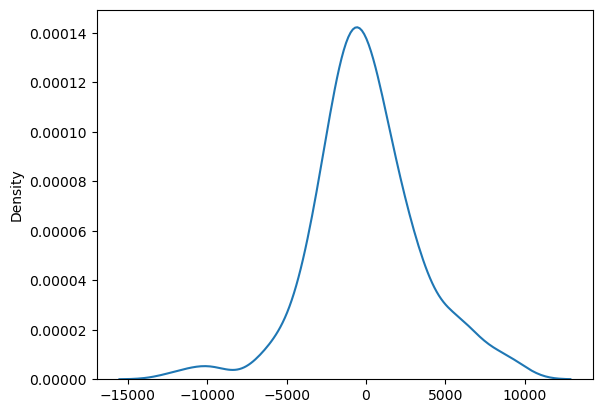

In [71]:
residuals = lin_reg_ols.resid  # ya-yp (error or residuals)
sns.kdeplot(residuals)

In [72]:
residuals.skew()

-0.024322645973554873

In [ ]:
# Skew - -0.5 to 0.5 are considered as very low skewness
# Skew - -1 to 1 are considered as moderate skewness

#### Homoscedasity

In [74]:

# Goldfeld test
# Ho : Data has homoscedacity (Equal Variance)
# Ha : Data has no homoscedacity (Unequal variance)

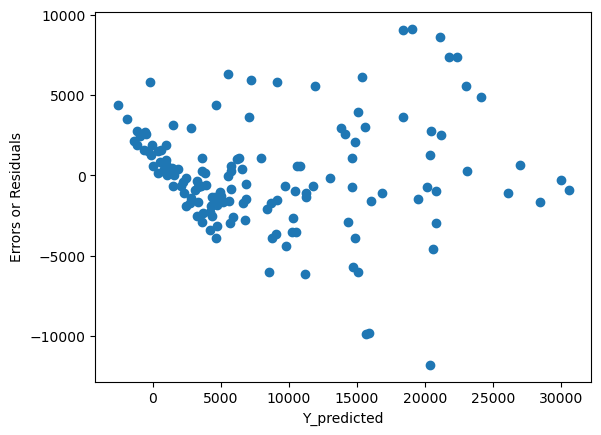

In [75]:
plt.xlabel("Y_predicted")
plt.ylabel("Errors or Residuals")
plt.scatter(y_train_pred,residuals)
plt.show()

In [76]:
from statsmodels.stats.api import het_goldfeldquandt

In [83]:
gq_test = het_goldfeldquandt(residuals,x_train_vif)
print("F-statistic:", gq_test[0])                      # test statistic for the Goldfeld-Quandt test
print("P-value:", gq_test[1])

F-statistic: 0.6883981204428025
P-value: 0.9179643516493512


In [ ]:
# pval = 0.91
# pval > sig lvl(0.05)
# Ho is accepted
# Data has homoscedacity (Equal Variance)

#### Linearity

In [84]:
# Linear rainbow

# Ho : Data is linear
# Ha : Data is not linear

In [85]:
from statsmodels.stats.diagnostic import linear_rainbow

In [86]:
linear_rainbow(lin_reg_ols)

(1.6222388040870748, 0.03044834438236758)

In [88]:
# pval = 0.03
# pval<0.05
# Reject the Ho
# Data is not linear

### Removing Features With High Values

In [89]:
# Model Optimization

In [90]:
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     49.36
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.23e-44
Time:                        17:19:15   Log-Likelihood:                -1363.6
No. Observations:                 143   AIC:                             2757.
Df Residuals:                     128   BIC:                             2802.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         8859.5929    300.523     29.481      0.000    8264.956    9454.230
Population                    -188.3056    479.191     -0.393      0.695   -1136.467     759.856
Area_sqm                      -164.9957    504.200     -0.327      0.744   -1162.641     832.650
Pop_Density_per sqm            792.9143    420.941      1.884      0.062     -39.990    1625.818
Coastline (coast/area ratio)  -934.4847    478.994     -1.951      0.053   -1882.257      13.287
Net migration                 2095.9410    362.524      5.782      0.000    1378.624    2813.258
Literacy (%)                    96.6548    537.808      0.180      0.858    -967.490    1160.800
Phones (per 1000)             6177.1518    621.426      9.940      0.000    4947.554    7406.750
Arable (%)                    -785.1527    396.326     -1.981      0.050   -1569.350      -0.955
Crops (%)                        4.8467    389.960      0.012      0.990    -766.756     776.449
Climate                        103.4080    412.652      0.251      0.803    -713.095     919.911
Birthrate                     -356.0923    673.285     -0.529      0.598   -1688.301     976.116
Deathrate                      182.4222    393.770      0.463      0.644    -596.719     961.563
Agriculture                  -1324.8111    533.342     -2.484      0.014   -2380.119    -269.503
Industry                       209.2793    388.263      0.539      0.591    -558.965     977.524
==============================================================================
Omnibus:                        7.712   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.703
Skew:                          -0.024   Prob(JB):                     0.000642
Kurtosis:                       4.570   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
pval = lin_reg_ols.pvalues
impt_feat = pval[pval<0.05].index
print(impt_feat)

Index(['const', 'Net migration', 'Phones (per 1000)', 'Arable (%)',
       'Agriculture'],
      dtype='object')


In [92]:
x_train_imp = x_train_cons[impt_feat]
x_test_imp = x_test_cons[impt_feat]

## Model Performace after removing insignificant Features(pval>0.05)

In [93]:
lin_reg_ols = sm.OLS(y_train,x_train_imp).fit()
lin_reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.89e-52
Time:                        17:19:17   Log-Likelihood:                -1368.7
No. Observations:                 143   AIC:                             2747.
Df Residuals:                     138   BIC:                             2762.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8886.1620    297.760     29.843      0.000    8297.399    9474.925
Net migration      2186.7834    338.145      6.467      0.000    1518.168    2855.399
Phones (per 1000)  6248.9196    463.605     13.479      0.000    5332.232    7165.607
Arable (%)         -307.4075    290.051     -1.060      0.291    -880.927     266.112
Agriculture       -1554.3275    402.477     -3.862      0.000   -2350.147    -758.508
==============================================================================
Omnibus:                       10.459   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               24.255
Skew:                          -0.119   Prob(JB):                     5.41e-06
Kurtosis:                       5.004   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Train & Test Score

In [94]:
y_train_pred = lin_reg_ols.predict(x_train_imp) # Giving the same data in which it is trained.
y_test_pred = lin_reg_ols.predict(x_test_imp) # Giving a new data which is unknown to my model

In [95]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 3471.4434465482
Test RMSE: 4375.898650847638


In [96]:
print('Train MAPE:',np.sqrt(mean_absolute_percentage_error(y_train,y_train_pred)))
print('Test MAPE:',np.sqrt(mean_absolute_percentage_error(y_test,y_test_pred)))

Train MAPE: 0.8314139858454214
Test MAPE: 0.8850493528417145


In [97]:
print('Train R2:',r2_score(y_train,y_train_pred))
print('Test R2:',r2_score(y_test,y_test_pred))

Train R2: 0.8321983253782748
Test R2: 0.8484665433552103


## Cross validation Score

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
lin_reg_sk = LinearRegression()  # Cross validation can take only scikit learn models
lin_reg_sk.fit(x_train,y_train)
scores = cross_val_score(lin_reg_sk,x_train_imp,y_train,cv=3,scoring='r2') # cv=3 (train_split combinations)
print(scores)
print('Avg Score:', np.mean(scores))
print('Std Score:',np.std(scores))

[0.83765442 0.77801744 0.83684195]
Avg Score: 0.8175046026402573
Std Score: 0.027923610483310324


## Implementation Ridge and Lasso Regression

In [100]:
from sklearn.linear_model import Lasso,Ridge

In [101]:
lasso = Lasso(alpha=1) # lambda = aplha
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [102]:
lasso.intercept_

8803.880801721134

In [103]:
lasso.coef_

array([-5.25524490e+00, -1.09420787e+02,  8.92293844e+02, -7.29803273e+02,
        2.06535418e+03, -2.80475091e+03, -4.61264897e+02,  5.90942196e+03,
       -1.47565052e+03, -4.16962811e+02, -6.65658175e+02,  5.56881217e+01,
        4.07578449e+02,  1.22181653e+03, -1.44407745e+03, -3.84141925e+02,
       -8.69670455e+02])

### Train & Test Score

In [104]:
y_train_pred = lasso.predict(x_train) # Giving the same data in which it is trained.
y_test_pred = lasso.predict(x_test) # Giving a new data which is unknown to my model

In [105]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 3250.4204719248564
Test RMSE: 4312.504579408025


In [106]:
print('Train MAPE:',np.sqrt(mean_absolute_percentage_error(y_train,y_train_pred)))
print('Test MAPE:',np.sqrt(mean_absolute_percentage_error(y_test,y_test_pred)))

Train MAPE: 0.8051699284308665
Test MAPE: 0.9150987645188847


In [107]:
print('Train R2:',r2_score(y_train,y_train_pred))
print('Test R2:',r2_score(y_test,y_test_pred))

Train R2: 0.8528855979767614
Test R2: 0.8528253001128476


## Cross validation Score

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
scores = cross_val_score(lasso,x_train,y_train,cv=3,scoring='r2') # cv=3 (train_split combinations)
print(scores)
print('Avg Score:', np.mean(scores))
print('Std Score:',np.std(scores))

[0.75005085 0.79648537 0.84738805]
Avg Score: 0.7979747532453411
Std Score: 0.03975169874609664


## Ridge Regression

In [110]:
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

### Train & Test Score

In [111]:
y_train_pred = ridge.predict(x_train) # Giving the same data in which it is trained.
y_test_pred = ridge.predict(x_test) # Giving a new data which is unknown to my model

In [112]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 3253.0100550875513
Test RMSE: 4289.953952612876


In [113]:
print('Train MAPE:',np.sqrt(mean_absolute_percentage_error(y_train,y_train_pred)))
print('Test MAPE:',np.sqrt(mean_absolute_percentage_error(y_test,y_test_pred)))

Train MAPE: 0.8028354935008304
Test MAPE: 0.9236105318717278


In [114]:
print('Train R2:',r2_score(y_train,y_train_pred))
print('Test R2:',r2_score(y_test,y_test_pred))

Train R2: 0.8526510949408692
Test R2: 0.8543604656973385


## Cross validation Score

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
scores = cross_val_score(ridge,x_train,y_train,cv=3,scoring='r2') # cv=3 (train_split combinations)
print(scores)
print('Avg Score:', np.mean(scores))
print('Std Score:',np.std(scores))

[0.79424189 0.79795498 0.84563497]
Avg Score: 0.8126106144660544
Std Score: 0.023400896568266442


## HyperParameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
params = {'alpha':[0.1,0.5,0.8,1,1.2,1.5,2,2.5,3,3.5,4,4.5,5]}

In [119]:
grd_srch = GridSearchCV(Ridge(),params,scoring='r2',cv=3)
grd_srch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 0.8, 1, 1.2, 1.5, 2, 2.5, 3, 3.5,
                                   4, 4.5, 5]},
             scoring='r2')

In [120]:
grid = pd.DataFrame(grd_srch.cv_results_)
grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008209,0.000146,0.001213,0.001715,0.1,{'alpha': 0.1},0.760387,0.796504,0.847224,0.801372,0.035618,13
1,0.001232,0.001742,0.001312,0.001855,0.5,{'alpha': 0.5},0.784277,0.797382,0.846599,0.809419,0.026828,12
2,0.005400,0.003912,0.000000,0.000000,0.8,{'alpha': 0.8},0.791338,0.797782,0.846036,0.811719,0.024408,11
3,0.005446,0.003852,0.000000,0.000000,1,{'alpha': 1},0.794242,0.797955,0.845635,0.812611,0.023401,9
4,0.000000,0.000000,0.005253,0.007429,1.2,{'alpha': 1.2},0.796363,0.798065,0.845219,0.813215,0.022640,7
5,0.005209,0.007367,0.000000,0.000000,1.5,{'alpha': 1.5},0.798645,0.798130,0.844574,0.813783,0.021774,4
6,0.005209,0.007367,0.000000,0.000000,2,{'alpha': 2},0.801099,0.798023,0.843467,0.814196,0.020736,2
7,0.000000,0.000000,0.005206,0.007362,2.5,{'alpha': 2.5},0.802650,0.797707,0.842337,0.814231,0.019976,1
8,0.005212,0.007370,0.000000,0.000000,3,{'alpha': 3},0.803704,0.797234,0.841196,0.814045,0.019380,3
9,0.000000,0.000000,0.005206,0.007362,3.5,{'alpha': 3.5},0.804452,0.796640,0.840052,0.813715,0.018894,5
